<a href="https://colab.research.google.com/github/mrigankapaul-dhubri/Mriganka-Covid-EDA/blob/main/MSE_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

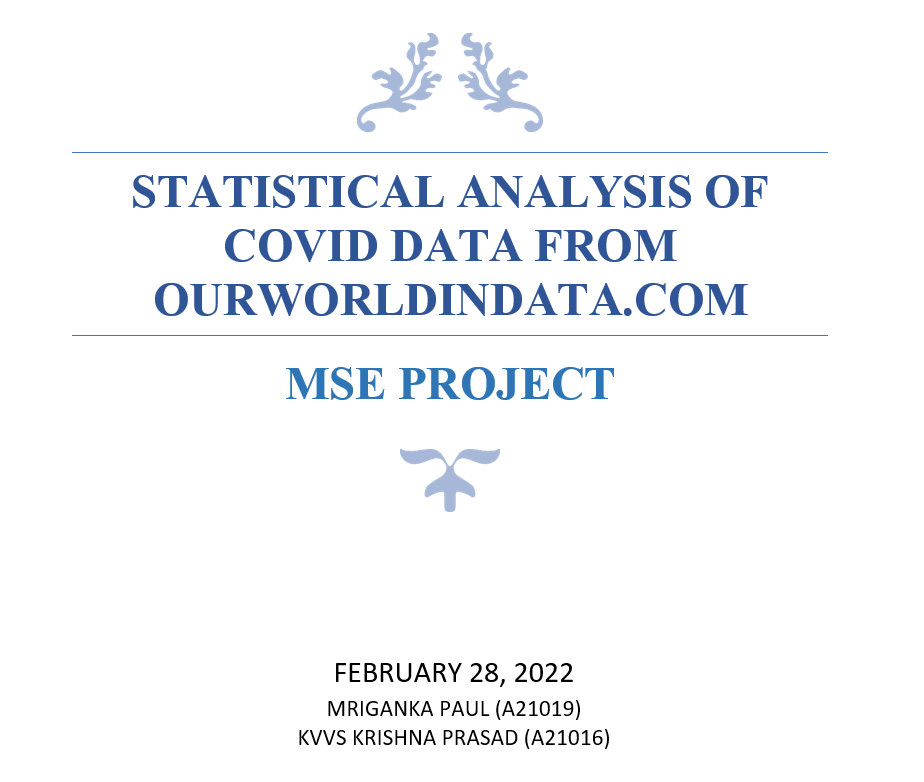


# **Contents**

Introduction 

Dataset

Features 

Exploratory Data Analysis and Feature Engineering

Hypothesis Testing

T test 

ANOVA 

Multiple Linear Regression 

Conclusion 


## **Introduction**

The purpose of the project is to analyse the data related to covid and understand the deaths related to covid all over the world and other conditions related to it. We would also be doing various statistical hypothesis testing to get a better insights out of the data. We would also run a Linear Regression using the independent and dependent variables to understand how the independent variables are helping describe the dependent variable. Our analysis will help which factors are affecting the deaths positively and which are affecting it negatively.




## **Dataset**
We have collected the data from the website "https://ourworldindata.org/coronavirus-source-data" for our project.


Note: We have used google colab to conduct our analysis.

In [1]:
# Loading the file into the google colab environment.
from google.colab import files
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [2]:
# Importing the libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:
# Reading the csv file "owid-covid-data.csv"
df = pd.read_csv("owid-covid-data.csv")

In [4]:
# Coping the data
data = df.copy()

In [5]:
# Reading the first 5 records of the data
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
162602,ZWE,Africa,Zimbabwe,2022-02-13,231381.0,82.0,139.857,5374.0,0.0,1.714,15331.194,5.433,9.267,356.079,0.000,0.114,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026321.0,134.263,NaN,3313.0,0.22,0.0422,23.7,tests performed,7757768.0,4318075.0,3348299.0,91394.0,4278.0,8749.0,51.40,28.61,22.19,0.61,580.0,3161.0,0.021,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
162603,ZWE,Africa,Zimbabwe,2022-02-14,231603.0,222.0,171.571,5374.0,0.0,1.714,15345.904,14.710,11.368,356.079,0.000,0.114,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7764290.0,4319919.0,3350481.0,93890.0,6522.0,8748.0,51.45,28.62,22.20,0.62,580.0,3065.0,0.020,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
162604,ZWE,Africa,Zimbabwe,2022-02-15,231603.0,0.0,142.857,5374.0,0.0,1.143,15345.904,0.000,9.466,356.079,0.000,0.076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7771022.0,4322787.0,3352751.0,95484.0,6732.0,8662.0,51.49,28.64,22.22,0.63,574.0,3140.0,0.021,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
162605,ZWE,Africa,Zimbabwe,2022-02-16,232213.0,610.0,210.429,5379.0,5.0,1.714,15386.322,40.418,13.943,356.410,0.331,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7782961.0,4327084.0,3357098.0,98779.0,11939.0,8399.0,51.57,28.67,22.24,0.65,557.0,2961.0,0.020,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
162606,ZWE,Africa,Zimbabwe,2022-02-17,232598.0,385.0,222.571,5381.0,2.0,1.143,15411.832,25.510,14.747,356.542,0.133,0.076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7795362.0,4331082.0,3362638.0,101642.0,12401.0,8448.0,51.65,28.70,22.28,0.67,560.0,2978.0,0.020,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [7]:
#checking the shape of the data. the data has 162607 rows and 67 columns/feautures
data.shape

(162607, 67)

In [8]:
#checking the names of the column/features
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

*Understanding the data types for each of the columns and checking if there are any null values in any of the columns. So that there are no null values in the dataset.*

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162607 entries, 0 to 162606
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    162607 non-null  object 
 1   continent                                   152859 non-null  object 
 2   location                                    162607 non-null  object 
 3   date                                        162607 non-null  object 
 4   total_cases                                 159642 non-null  float64
 5   new_cases                                   159616 non-null  float64
 6   new_cases_smoothed                          158465 non-null  float64
 7   total_deaths                                141946 non-null  float64
 8   new_deaths                                  142122 non-null  float64
 9   new_deaths_smoothed                         141992 non-null  float64
 

Above we can see that there are some null values in the "continent" column. Need to check those records for which we donot have any continent

*Checking the number of records for which the "continent" has null values*

In [10]:
data["continent"].isnull().sum() #checking the number of records for which the "continent" has null values

9748

*Finding the records for which the "continent" is null and assigning it to a new variable*

In [11]:
data_continent_null = data[data["continent"].isna()] #finding the records for which the "continent" is null and assigning it to a new variable

*Checking how many unique location records are present for which "continent" is null*

In [12]:
data_continent_null["location"].unique() #checking how many unique location records are present for which "continent" is null

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'International', 'Low income', 'Lower middle income',
       'North America', 'Oceania', 'South America', 'Upper middle income',
       'World'], dtype=object)

*Checking randomly some records for location = "Asia" where "continent" is null*

In [13]:
data_continent_null[data_continent_null['location'] == 'Asia'] #checking randomly some records for location = "Asia" where "continent" is null

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
7931,OWID_ASI,NaN,Asia,2020-01-22,556.0,0.0,NaN,17.0,0.0,NaN,0.119,0.000,NaN,0.004,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.678445e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7932,OWID_ASI,NaN,Asia,2020-01-23,654.0,98.0,NaN,18.0,1.0,NaN,0.140,0.021,NaN,0.004,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.678445e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7933,OWID_ASI,NaN,Asia,2020-01-24,937.0,283.0,NaN,26.0,8.0,NaN,0.200,0.060,NaN,0.006,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.678445e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7934,OWID_ASI,NaN,Asia,2020-01-25,1429.0,492.0,NaN,42.0,16.0,NaN,0.305,0.105,NaN,0.009,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.678445e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7935,OWID_ASI,NaN,Asia,2020-01-26,2105.0,676.0,NaN,56.0,14.0,NaN,0.450,0.144,NaN,0.012,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.678445e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684,OWID_ASI,NaN,Asia,2022-02-13,108650955.0,496960.0,574157.571,1324558.0,1526.0,2125.143,23223.732,106.223,122.724,283.119,0.326,0.454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.022769e+09,3.343575e+09,2.939182e+09,701018920.0,23919197.0,16909166.0,150.11,71.47,62.82,14.98,3614.0,3279139.0,0.070,NaN,4.678445e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8685,OWID_ASI,NaN,Asia,2022-02-14,109134559.0,483604.0,562801.714,1326457.0,1899.0,2061.714,23327.101,103.369,120.297,283.525,0.406,0.441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.038597e+09,3.345927e+09,2.943235e+09,704589154.0,15827831.0,17393911.0,150.45,71.52,62.91,15.06,3718.0,3169781.0,0.068,NaN,4.678445e+09,NaN,NaN,NaN,NaN,N

*Dropping the records which had 'continent' as "NULL"*

In [14]:
data.drop(data[data['continent'].isna()].index, inplace = True) #dropped those records which had 'continent' as "NULL"

*Understanding the data types for each of the columns and checking if there are any null values in any of the columns. So that there are no null values in the dataset.*

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152859 entries, 0 to 162606
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    152859 non-null  object 
 1   continent                                   152859 non-null  object 
 2   location                                    152859 non-null  object 
 3   date                                        152859 non-null  object 
 4   total_cases                                 149901 non-null  float64
 5   new_cases                                   149868 non-null  float64
 6   new_cases_smoothed                          148794 non-null  float64
 7   total_deaths                                132411 non-null  float64
 8   new_deaths                                  132387 non-null  float64
 9   new_deaths_smoothed                         132329 non-null  float64
 

*Checking the number of records in each continent*

In [16]:
data.continent.value_counts()

Africa           38537
Europe           36277
Asia             35405
North America    24370
South America     9309
Oceania           8961
Name: continent, dtype: int64

*Checking the number of records for each location*

In [17]:
data.location.value_counts()

Argentina    779
Mexico       779
Thailand     776
Taiwan       764
China        758
            ... 
Palau        180
Tuvalu       179
Niue         157
Tokelau      114
Pitcairn      85
Name: location, Length: 225, dtype: int64

In [52]:
data_new = data[['continent', 'location', 'date', 'total_cases',
       'total_deaths', 'icu_patients',
       'hosp_patients',  'total_tests',
       'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       ]]

In [53]:
data_new.shape

(152859, 12)

In [54]:
data_new.head()

,continent,location,date,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Asia,Afghanistan,2020-02-24,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,Afghanistan,2020-02-25,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Asia,Afghanistan,2020-02-26,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Asia,Afghanistan,2020-02-27,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Asia,Afghanistan,2020-02-28,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Understanding the data types for each of the columns and checking if there are any null values in any of the columns. So that there are no null values in the dataset.*

In [55]:
#checking the data type and if there are any null values in the dataset.
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152859 entries, 0 to 162606
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   continent                152859 non-null  object 
 1   location                 152859 non-null  object 
 2   date                     152859 non-null  object 
 3   total_cases              149901 non-null  float64
 4   total_deaths             132411 non-null  float64
 5   icu_patients             22847 non-null   float64
 6   hosp_patients            23588 non-null   float64
 7   total_tests              67756 non-null   float64
 8   total_vaccinations       38534 non-null   float64
 9   people_vaccinated        36429 non-null   float64
 10  people_fully_vaccinated  33953 non-null   float64
 11  total_boosters           12468 non-null   float64
dtypes: float64(9), object(3)
memory usage: 15.2+ MB


*Replacing the null values with 0.0*

In [56]:
#Replacing the null values with 0.0
for i in ['total_cases','total_deaths', 'icu_patients','hosp_patients', 'total_tests', 'total_vaccinations','people_vaccinated', 'people_fully_vaccinated', 
          'total_boosters']:
          data_new[i].fillna(0.0,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



*Reading the first 5 records of the data*

In [57]:
data_new.head()

,continent,location,date,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Asia,Afghanistan,2020-02-24,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Checking if the records have any null data*

In [58]:
data_new.isnull().sum()

continent                  0
location                   0
date                       0
total_cases                0
total_deaths               0
icu_patients               0
hosp_patients              0
total_tests                0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
total_boosters             0
dtype: int64

In [59]:
#data_new['date'] = pd.to_datetime(data_new['date'], format='%Y-%m-%d')

data_new['date'] = data_new['date'].str.slice(0, 7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



*Checking the first 5 records in the new data type*

In [60]:
data_new.head()

,continent,location,date,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Asia,Afghanistan,2020-02,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Asia,Afghanistan,2020-02,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Asia,Afghanistan,2020-02,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Asia,Afghanistan,2020-02,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Asia,Afghanistan,2020-02,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Grouping the data of continent, location and date into the new data type *

In [61]:
data_new = data_new.groupby(['continent','location','date'], as_index = False).sum()

Checking the first 5 records in the new data

In [62]:
data_new.head()

,continent,location,date,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Africa,Algeria,2020-02,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Africa,Algeria,2020-03,4823.0,324.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Africa,Algeria,2020-04,69497.0,9197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Africa,Algeria,2020-05,211394.0,16901.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Africa,Algeria,2020-06,337819.0,23600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Understanding the shape of the data now*

In [63]:
data_new.shape

(5228, 12)

*Here we understand the count, mean, standard deviation, min(1.5 IQR), Q1 = 25%, Q2 = 50%, Q3 = 75%, max(1.5 IQR) and IQR = Q3 - Q1 for all the continuous variables. Here, we can see the details of total_cases, total_deaths, icu_patients, hosp_patients, total_tests, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters.*

In [64]:
data_new.describe()

,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
count,5.228000e+03,5.228000e+03,5228.000000,5.228000e+03,5.228000e+03,5.228000e+03,5.228000e+03,5.228000e+03,5.228000e+03
mean,1.757477e+07,3.656290e+05,3998.748661,1.863101e+04,2.132860e+08,3.044538e+08,1.128626e+08,8.146201e+07,8.192287e+06
std,8.796928e+07,1.594587e+06,32086.105655,1.418324e+05,1.212062e+09,3.051596e+09,8.909675e+08,5.849552e+08,7.493329e+07
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.135075e+04,3.617500e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.033035e+05,7.727500e+03,0.000000,0.000000e+00,1.241105e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.105248e+06,1.047472e+05,0.000000,0.000000e+00,4.423078e+07,8.101332e+06,4.255886e+06,1.782493e+06,0.000000e+00
max,2.040291e+09,2.655212e+07,833034.000000,4.244018e+06,2.353896e+10,9.091022e+10,2.803899e+10,2.036477e+10,2.570553e+09


*Checking for the maximum count of the patients admitted in the ICU as per our data*

In [65]:
data_new['icu_patients'].max()

833034.0

*Below we can understand the total deaths compared the total cases in each continent.*




In [66]:
from numpy.core.fromnumeric import size
data_fig = data_new[['continent','total_cases','total_deaths',]]
data_fig = data_fig.groupby(['continent'], as_index = False).sum()
print(data_fig)
fig = px.bar(data_fig, x='continent', y=['total_cases','total_deaths'],title= "Total Covid cases continent wise")
fig.show()

       continent   total_cases  total_deaths
0         Africa  3.025414e+09    75415619.0
1           Asia  2.645692e+10   389814184.0
2         Europe  2.602631e+10   535476381.0
3  North America  2.162411e+10   462640308.0
4        Oceania  1.703324e+08     1165436.0
5  South America  1.457782e+10   446996711.0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



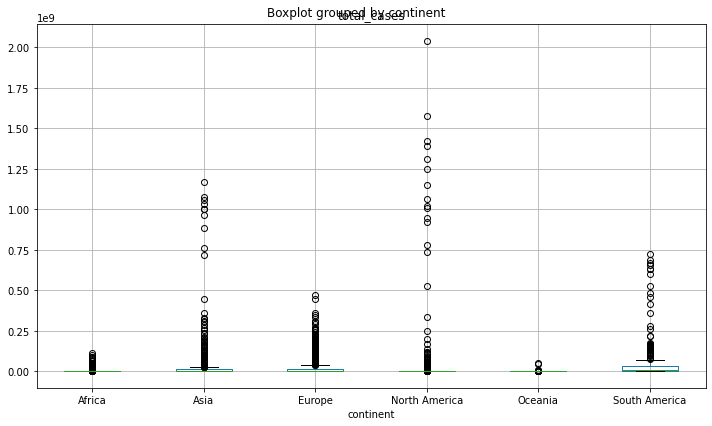

In [67]:

boxplot = data_new.boxplot(column=['total_cases'], by='continent')

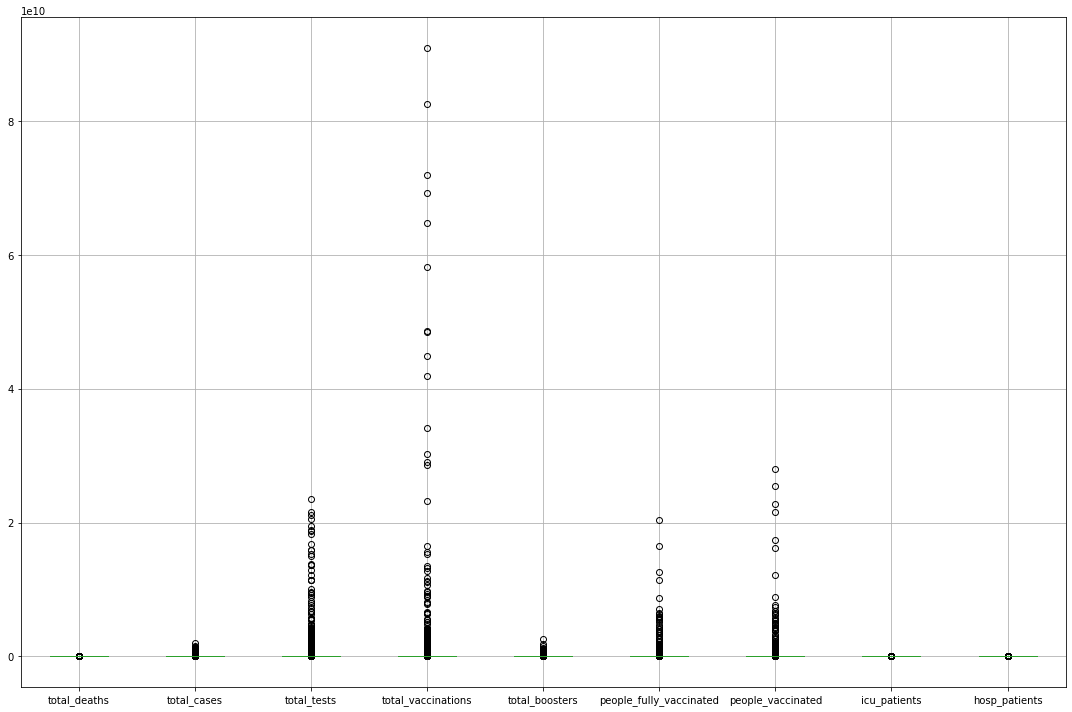

In [68]:
data_new.boxplot(column =['total_deaths', 'total_cases','total_tests','total_vaccinations','total_boosters','people_fully_vaccinated','people_vaccinated','icu_patients','hosp_patients'],figsize = (15,10))

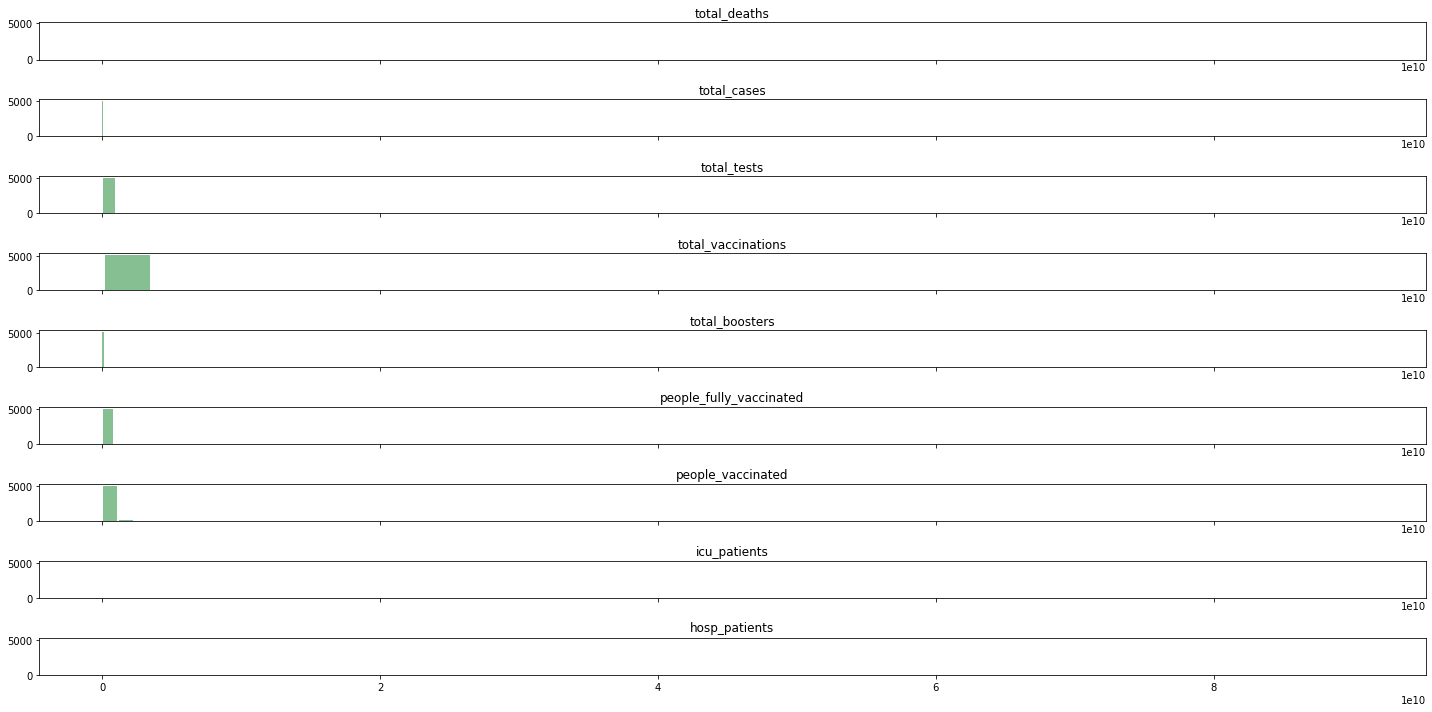

In [69]:
ax = data_new.hist(column=['total_deaths', 'total_cases','total_tests','total_vaccinations','total_boosters','people_fully_vaccinated','people_vaccinated','icu_patients','hosp_patients'], bins=25, grid=False, figsize=(20,10), layout=(9,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

*Below we can understand the total tests in each continent.*

In [36]:
data_fig = data_new[['continent','total_tests']]
data_fig = data_fig.groupby(['continent'], as_index = False).sum()
fig = px.bar(data_fig, x='continent', y='total_tests',title= "Total Covid tests continent wise")
fig.show()

*Below we can understand the total vaccinations, total boosters, people fully vaccinated, people vaccinated with atleast 1 dose  in each continent.*

In [37]:
data_fig = data_new[['continent','total_vaccinations','total_boosters','people_fully_vaccinated','people_vaccinated']]
data_fig = data_fig.groupby(['continent'], as_index = False).sum()
fig = px.bar(data_fig, x='continent', y=['total_vaccinations','total_boosters','people_fully_vaccinated','people_vaccinated'],title= "Vaccination status")
fig.show()

*Below we can understand the total vaccinations, total boosters, people fully vaccinated, people vaccinated with atleast 1 dose  in each continent.*

In [38]:
data_fig = data_new[['continent','icu_patients','hosp_patients']]
data_fig = data_fig.groupby(['continent'], as_index = False).sum()
print(data_fig)
fig = px.bar(data_fig, x='continent', y=['icu_patients','hosp_patients'],title= "Total people admitted in Hospital and ICU")
fig.show()

       continent  icu_patients  hosp_patients
0         Africa       15710.0            0.0
1           Asia      617077.0      4231514.0
2         Europe     8467586.0     56008681.0
3  North America     8976951.0     36460222.0
4        Oceania       50244.0       389084.0
5  South America     2777890.0       313416.0


In [39]:
data_fig = data_new[['date','total_cases','total_deaths']]
data_fig['date'] = data_fig['date'].str.slice(0, 4)
data_fig = data_fig.groupby(['date'], as_index = False).sum()

print(data_fig)
fig = px.bar(data_fig, x='date', y=['total_cases','total_deaths'],title= "Covid cases and deaths year wise")
fig.show()

   date   total_cases  total_deaths
0  2020  7.639887e+09  2.331053e+08
1  2021  6.712967e+10  1.408113e+09
2  2022  1.711135e+10  2.702903e+08


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



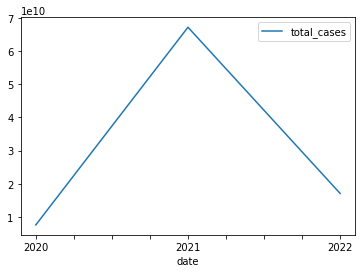

In [40]:
data_fig = data_new[['date', 'total_cases']]
data_fig['date'] = data_fig['date'].str.slice(0, 4)
data_fig = data_fig.groupby(data_fig['date'], as_index = False).sum()
data_fig.set_index('date',inplace = True)
lines = data_fig.plot.line()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



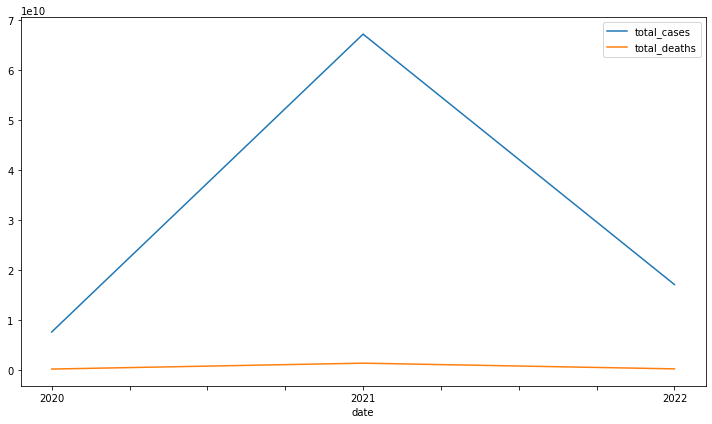

In [41]:
data_fig = data_new[['date','total_cases', 'total_deaths']]
data_fig['date'] = data_fig['date'].str.slice(0, 4)
data_fig = data_fig.groupby(data_fig['date'], as_index = False).sum()
plt.rcParams["figure.figsize"] = [10,6]
plt.rcParams["figure.autolayout"] = True
data_fig.set_index('date',inplace = True)
lines = data_fig.plot.line()

In [42]:
data_new.corr()

,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
total_cases,1.000000,0.925932,0.608987,0.592193,0.894079,0.359374,0.737756,0.727161,0.554982
total_deaths,0.925932,1.000000,0.556171,0.531437,0.755635,0.313333,0.642076,0.646716,0.451278
icu_patients,0.608987,0.556171,1.000000,0.904670,0.560083,0.119330,0.219375,0.276635,0.359538
hosp_patients,0.592193,0.531437,0.904670,1.000000,0.559189,0.112698,0.204457,0.259371,0.407295
total_tests,0.894079,0.755635,0.560083,0.559189,1.000000,0.365634,0.762324,0.732320,0.453680
total_vaccinations,0.359374,0.313333,0.119330,0.112698,0.365634,1.000000,0.526820,0.658099,0.239396
people_vaccinated,0.737756,0.642076,0.219375,0.204457,0.762324,0.526820,1.000000,0.932935,0.286809
people_fully_vaccinated,0.727161,0.646716,0.276635,0.259371,0.732320,0.658099,0.932935,1.000000,0.393382
total_boosters,0.554982,0.451278,0.359538,0.407295,0.453680,0.239396,0.286809,0.393382,1.000000


In [72]:
data_new['total_cases'] = np.sqrt(data_new['total_cases'])


In [75]:
for i in ['total_deaths', 'icu_patients', 'hosp_patients', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']:
  data_new[i] = np.sqrt(data_new[i])

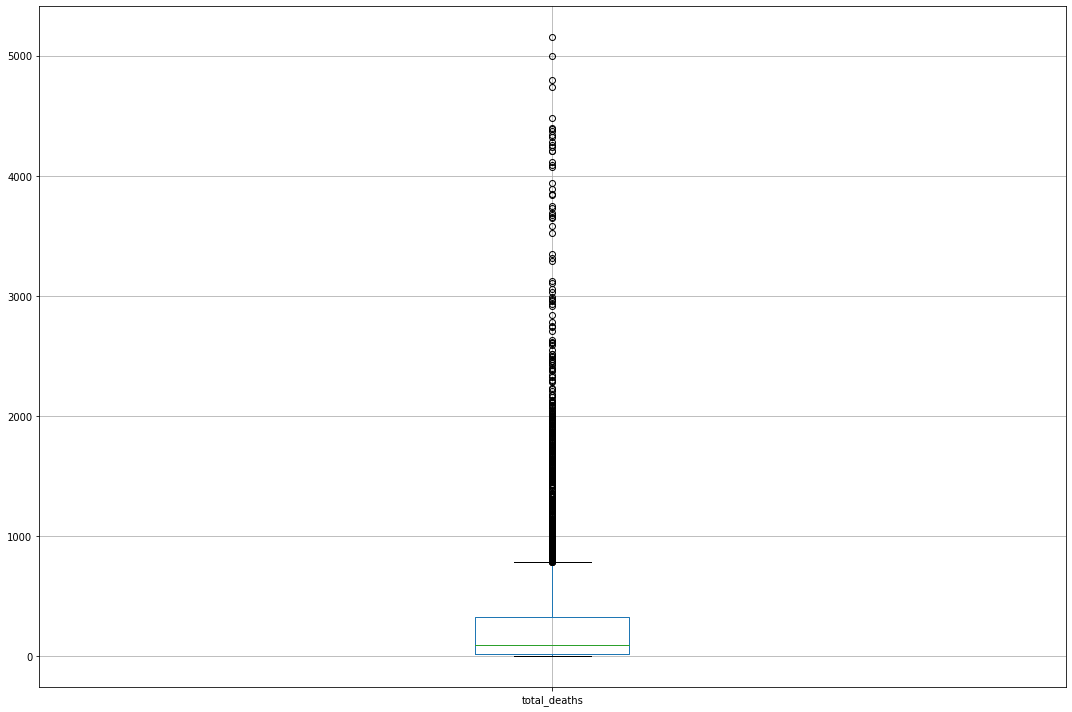

In [102]:
data_new.boxplot(column ='total_deaths',figsize = (15,10))

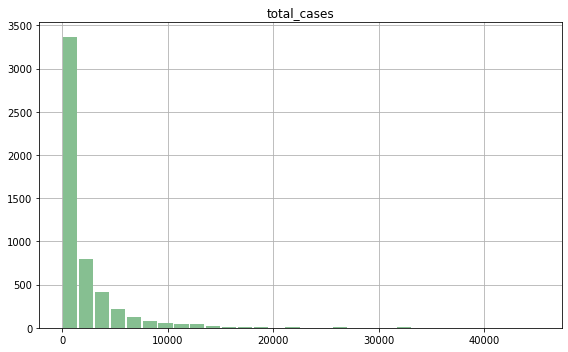

In [93]:
ax = data_new.hist(column='total_cases', bins=30, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

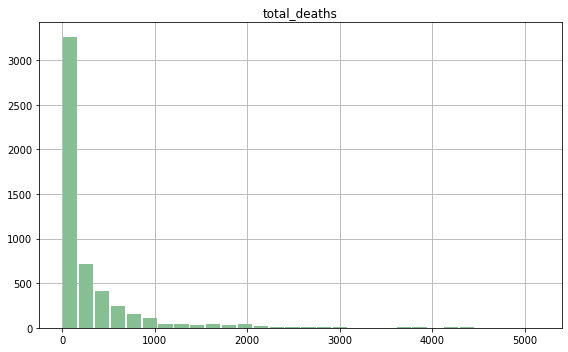

In [94]:
ax = data_new.hist(column='total_deaths', bins=30, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

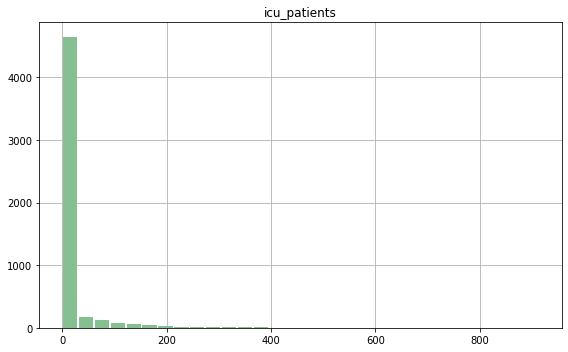

In [95]:
ax = data_new.hist(column='icu_patients', bins=30, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

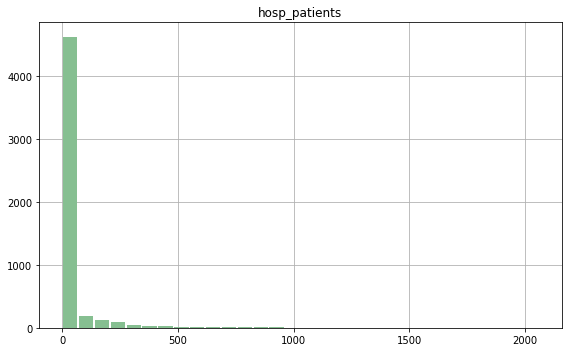

In [96]:
ax = data_new.hist(column='hosp_patients', bins=30, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

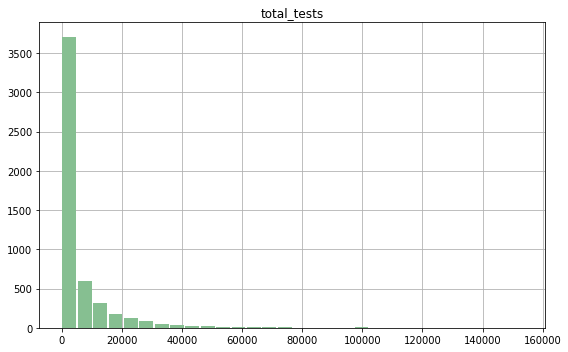

In [97]:
ax = data_new.hist(column='total_tests', bins=30, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

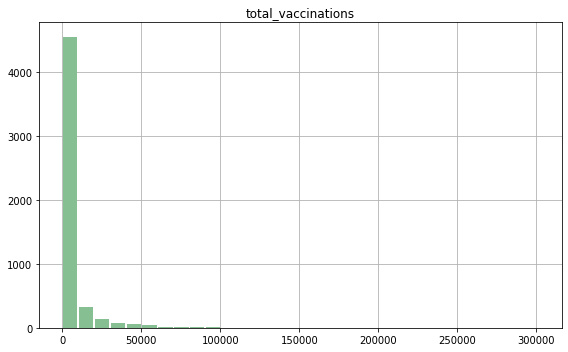

In [98]:
ax = data_new.hist(column='total_vaccinations', bins=30, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

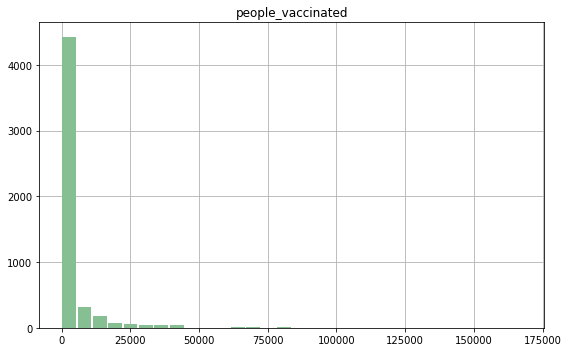

In [99]:
ax = data_new.hist(column='people_vaccinated', bins=30, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

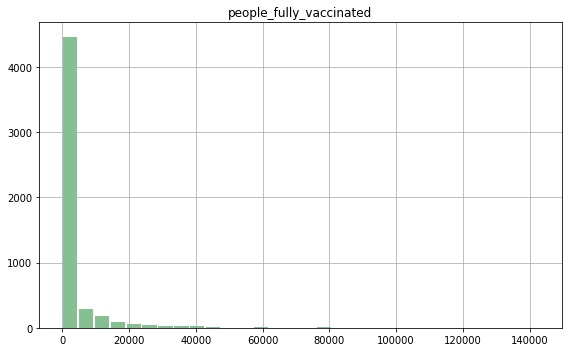

In [100]:
ax = data_new.hist(column='people_fully_vaccinated', bins=30, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

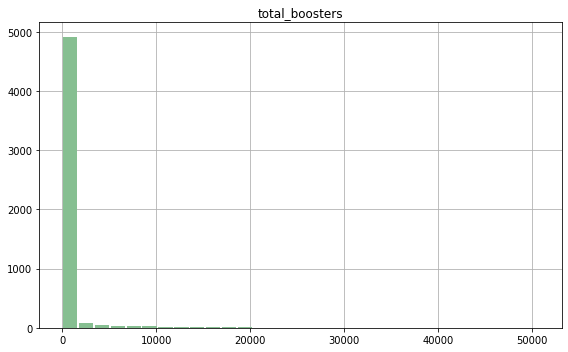

In [101]:
ax = data_new.hist(column='total_boosters', bins=30, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

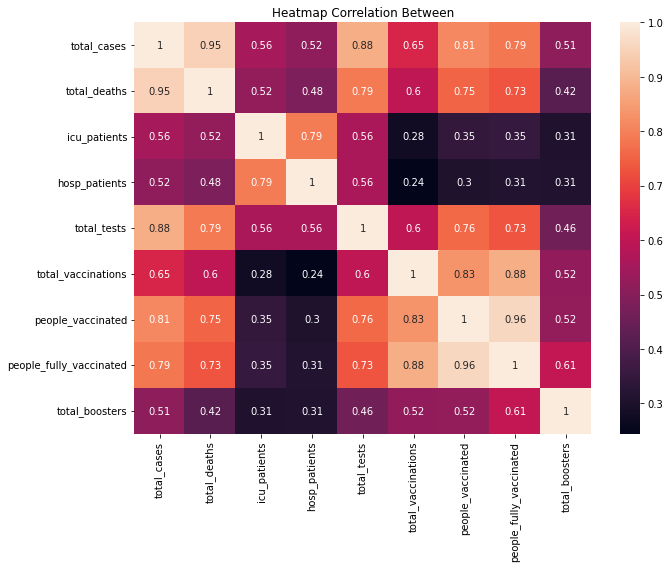

In [108]:
plt.figure(figsize=(10,8))
sns.heatmap(data_new.corr(), annot=True)
plt.title('Heatmap Correlation Between')
plt.show()

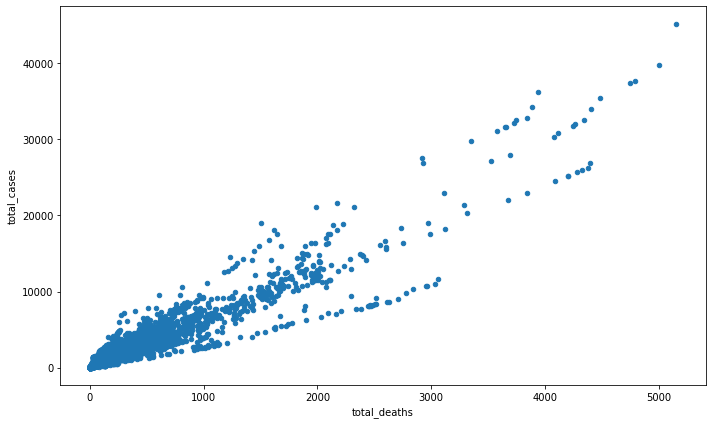

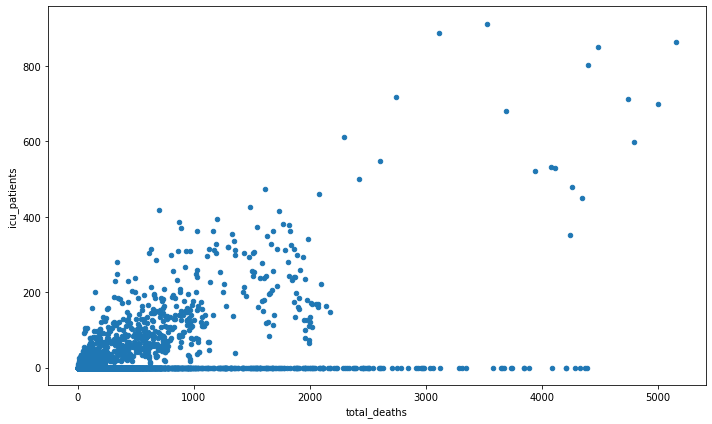

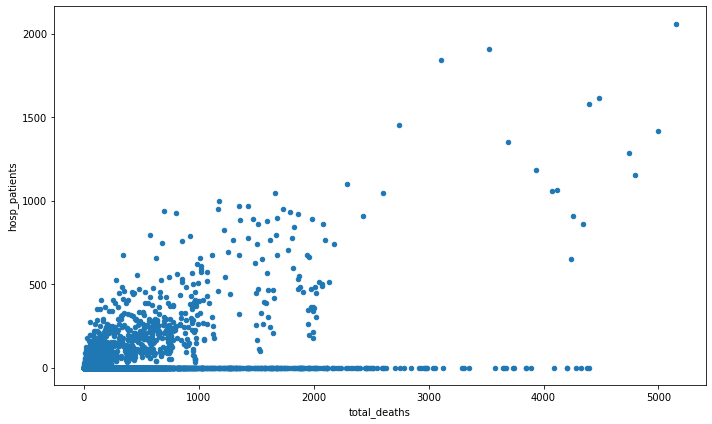

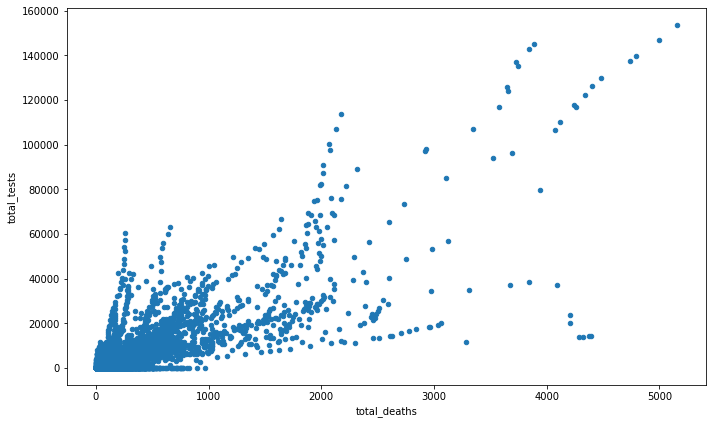

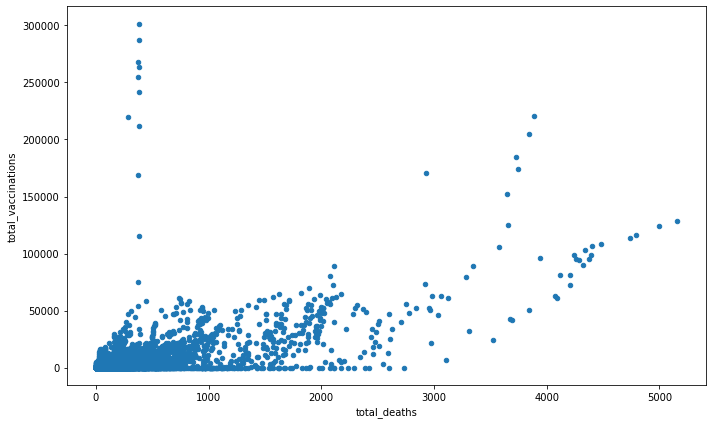

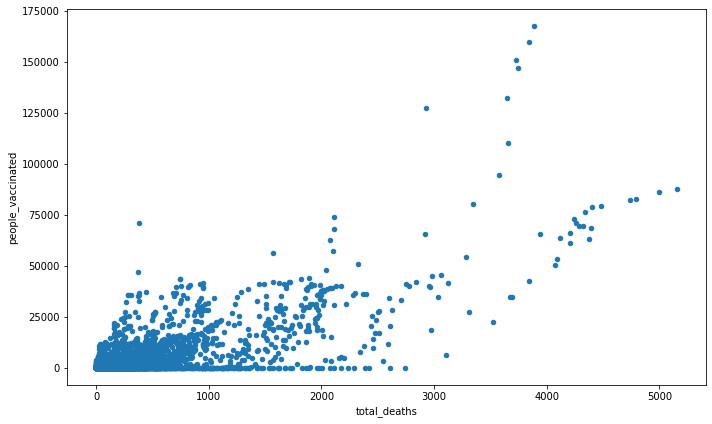

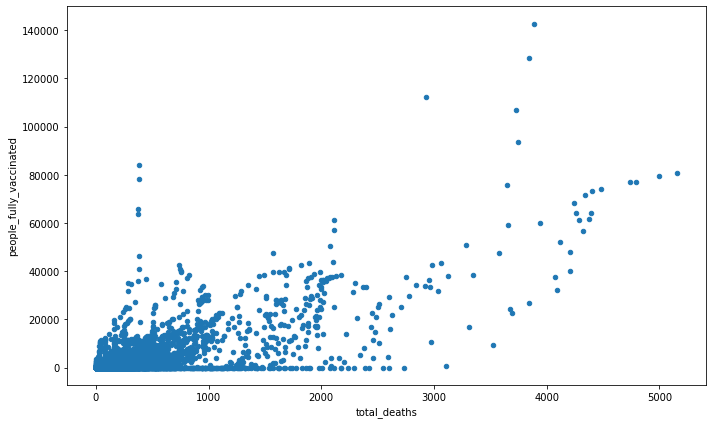

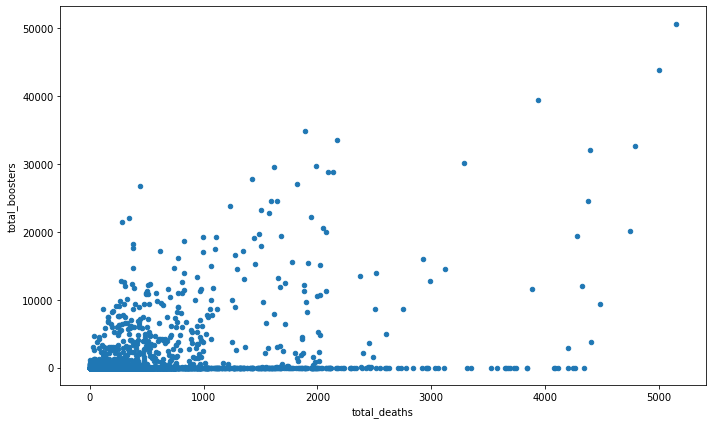

In [105]:
for i in ['total_cases', 'icu_patients', 'hosp_patients', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']:
  data_new.plot(kind = 'scatter', x = 'total_deaths', y = i)
  plt.show()

In [109]:
from scipy import stats

In [110]:
import scipy
scipy.__version__

'1.4.1'

In [111]:
data_y = data_new['total_cases']
data_x = data_new['total_deaths']
ttest, pval = stats.ttest_ind(data_x, data_y)
print(ttest)
print(pval)

-34.54531828062261
1.0032574739252815e-247


In [112]:
data_y = data_new['total_cases'][data_new['continent'] == 'Asia']
data_x = data_new['total_cases'][data_new['continent'] == 'Africa']

In [114]:
ttest, pval = stats.ttest_ind(data_x, data_y)
print('tTest value: ',ttest)
print('p-value: ',pval)

tTest value:  -14.756110806112796
p-value:  2.492887854002729e-47


In [116]:
data_y = data_new['total_cases'][data_new['continent'] == 'North America']
data_x = data_new['total_cases'][data_new['continent'] == 'South America']

ttest, pval = stats.ttest_ind(data_x, data_y)
print('tTest value: ',ttest)
print('p-value: ',pval)

tTest value:  7.65976578977815
p-value:  3.9525407688276227e-14


In [119]:
data_y = data_new['total_cases'][data_new['continent'] == 'Asia']
data_x = data_new['total_cases'][data_new['continent'] == 'Europe']

ttest, pval = stats.ttest_ind(data_x, data_y)
print('tTest value: ',ttest)
print('p-value: ',pval)

tTest value:  1.796092290594495
p-value:  0.0726030525297716


In [123]:
anova_data1 = data_new['total_deaths'][data_new['continent'] == 'Asia']
anova_data2 = data_new['total_deaths'][data_new['continent'] == 'North America']
anova_data3 = data_new['total_deaths'][data_new['continent'] == 'Europe']
anova_data4 = data_new['total_deaths'][data_new['continent'] == 'South America']


fvalue, pvalue = stats.f_oneway(anova_data1, anova_data2, anova_data3, anova_data4)
print('f-value: ',fvalue)
print('f-significance: ',pvalue)

f-value:  57.06077653812974
f-significance:  4.985770364384464e-36


In [124]:
data_y = data_new['total_tests'][data_new['continent'] == 'Asia']
data_x = data_new['total_tests'][data_new['continent'] == 'Europe']

ttest, pval = stats.ttest_ind(data_x, data_y)
print(ttest)
print(pval)

3.3309273399689032
0.0008784170320082491


From the above test

In [121]:
data_y = data_new['people_fully_vaccinated']
data_x = data_new['people_vaccinated']


ttest, pval = stats.ttest_ind(data_x, data_y)
print('tTest value: ',ttest)
print('p-value: ',pval)

tTest value:  3.277022673503223
p-value:  0.0010525008655098915


In [125]:
data_y = data_new['hosp_patients']
data_x = data_new['icu_patients']


ttest, pval = stats.ttest_ind(data_x, data_y)
print('tTest value: ',ttest)
print('p-value: ',pval)

tTest value:  -9.7366143513154
p-value:  2.6174523011571955e-22


In [126]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [155]:
#X = data_new.drop(["total_deaths","continent","location","date",'people_vaccinated', 'total_tests', 'people_fully_vaccinated'], axis = 1)
X = data_new.drop(["total_deaths","continent","location","date",'icu_patients','total_vaccinations'], axis = 1)
y= data_new["total_deaths"]
X_cons = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [156]:
X_cons.head()

,const,total_cases,hosp_patients,total_tests,people_vaccinated,people_fully_vaccinated,total_boosters
0,1.0,2.236068,0.0,0.0,0.0,0.0,0.0
1,1.0,69.447822,0.0,0.0,0.0,0.0,0.0
2,1.0,263.622837,0.0,0.0,0.0,0.0,0.0
3,1.0,459.776032,0.0,0.0,0.0,0.0,0.0
4,1.0,581.221989,0.0,0.0,0.0,0.0,0.0


In [157]:
lm = sm.OLS(y, X_cons).fit()

In [150]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           total_deaths   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     7389.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:21:49   Log-Likelihood:                -33652.
No. Observations:                5228   AIC:                         6.732e+04
Df Residuals:                    5219   BIC:                         6.738e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [158]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           total_deaths   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     9854.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:23:09   Log-Likelihood:                -33652.
No. Observations:                5228   AIC:                         6.732e+04
Df Residuals:                    5221   BIC:                         6.736e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [159]:
y_pred = lm.predict()

In [160]:
y_pred

array([ -1.2842957 ,  10.03392163,  42.73229472, ..., 624.15478967,
       628.99456283, 482.16530107])

In [162]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y, y_pred)

In [167]:
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

22830.025080692714
